<img width="10%" alt="Naas" src="https://landen.imgix.net/jtci2pxwjczr/assets/5ice39g4.png?w=160"/>

# TikTok - Get videos stats
<a href="https://app.naas.ai/user-redirect/naas/downloader?url=https://raw.githubusercontent.com/jupyter-naas/awesome-notebooks/master/TikTok/TikTok_Generate_leads_from_posts.ipynb" target="_parent"><img src="https://naasai-public.s3.eu-west-3.amazonaws.com/open_in_naas.svg"/></a>

**Tags:** #tiktok #videos #stats #snippet #content

**Author:** [Alok Chilka](https://www.linkedin.com/in/calok64/)

## Input

### Import libraries

In [ ]:
try:
    from TikTokAPI import TikTokAPI
except:
    !pip install --user PyTikTokAPI
    from TikTokAPI import TikTokAPI
import nest_asyncio
import pandas as pd

In [ ]:
nest_asyncio.apply()

### Setup your TikTok


### How to get cookies ?

- "s_v_web_id and "tt_webid"

While logged into your tiktok account, Click F12 to open developer console in your browser. Navigate to path Storage -> Cookies -> https://www.tiktok.com and on right hand side there are the parameters marked which you will need.

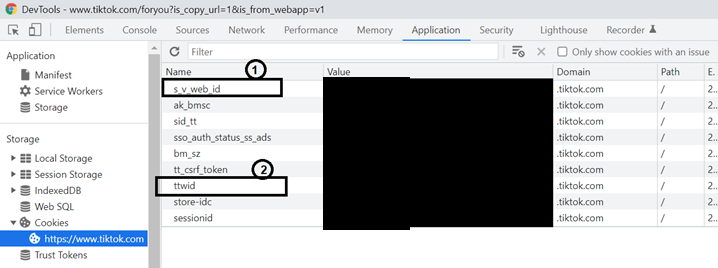


In [ ]:
# Cookies
cookie = {
  "s_v_web_id": "verify_l0ecjehXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX",
  "tt_webid": "1%7CaSy-x8YGNmB_l9qsXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX"
}

# Username
username = "tiktester04"

#setup count of videos to be retrieved ( preferred count by api is 30)
video_count = 30

#set hashtag to identify and extract videos
user_hastag = "#teslatok"

#set application type. This is used to distinguish data for application in master data model
APP_TYPE = "TikTok"

### Create connection object

In [ ]:
api = TikTokAPI(cookie=cookie)

## Model

### Get videos by user

In [ ]:
def get_videos_by_user(username):
    #Get videos by userName
    '''
    Video ID

    '''
    userVideoIdList = []
    #userVideos = api.getVideosByUserName(user_name=username, count=video_count,cursor=0)
    userVideos = api.getVideosByHashTag(user_hastag,count=video_count)
    userVideoList = userVideos["itemList"]

    for userVideo in userVideoList:
        userVideoIdList.append(userVideo["video"]["id"])
    
    return userVideoIdList

### Get video id list

In [ ]:
userVideoIdList = get_videos_by_user(username)
userVideoIdList

### Get individual videos by ID

In [ ]:
def get_video_stats_by_id(userVideoIdList):
    video_stats = {}
    tiktokDF = pd.DataFrame()
    for videoId in userVideoIdList:
        video_stats[videoId] = ""
        videoByID = api.getVideoById(videoId)
        videoTitle = ""
        videoDesc = videoByID["itemInfo"]["itemStruct"]["desc"]
        videoCreateTime = videoByID["itemInfo"]["itemStruct"]["createTime"]
        videoLink = videoByID["itemInfo"]["itemStruct"]["video"]["playAddr"]

        videoStats = videoByID["itemInfo"]["itemStruct"]["stats"]
        videoLikeCount = videoStats["diggCount"]
        videoCommentCount = videoStats["commentCount"]
        videoPlayCount = videoStats["playCount"]
        videoShareCount = videoStats["shareCount"]

        videoAuthor = videoByID["itemInfo"]["itemStruct"]["author"]
        videoAuthorName = videoAuthor["uniqueId"]
        videoAuthorStats = videoByID["itemInfo"]["itemStruct"]["authorStats"]
        videoAuthorFollowerCount = videoAuthorStats["followerCount"]
        videoAuthorFollowingCount = videoAuthorStats["followingCount"]
        videoAuthorTotalVideoCount = videoAuthorStats["videoCount"]
        videoAuthorTotalHeartCount = videoAuthorStats["heartCount"]

        video_stats[videoId] = video_stats_obj
        data=[[videoId,videoCreateTime,videoAuthorName,videoTitle,videoDesc,videoLink,videoPlayCount,videoCommentCount,videoLikeCount,videoShareCount,APP_TYPE]]
        df = pd.DataFrame(data,columns=["ACTIVITY_ID","PUBLISHED_DATE","AUTHOR_NAME","TITLE","TEXT","POST_URL","VIEWS","COMMENTS","LIKES","SHARES","APPLICATION_TYPE"
        ])
        tiktokDF = tiktokDF.append(df)
    return tiktokDF

## Output

### Get stats by video id

In [ ]:
df_videos = get_video_stats_by_id(userVideoIdList)
df_videos